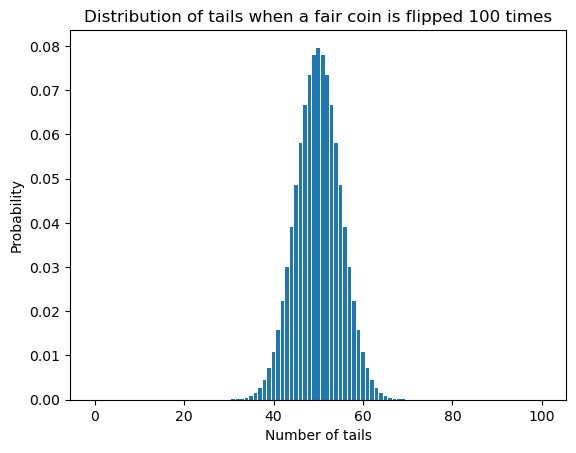

In [1]:
#Group Assignment 3
#Haseeb and Abira 
#GROUP 5

#Python libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import binom
import math
import random
import statistics

#question1)
#parta)compute the distribution of x and represent it using a bar plot
n = 100 # number of coin flips
p = 0.5 # probability of getting tails on a single flip

x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf)
plt.xlabel('Number of tails')
plt.ylabel('Probability')
plt.title('Distribution of tails when a fair coin is flipped 100 times')
plt.show()

In [2]:
#question1)
#partb) Calculate the mean /expected value and the standard deviation of x
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))
print("Mean: ", mean)
print("Standard deviation: ", std_dev)


Mean:  50.0
Standard deviation:  5.0


In [3]:
#question1)
#partc) determine the probability that x is between: the mean of +/- 1 standard dev, the mean of +/- 2 standard dev, the mean of +/-3 standard dev
from scipy.stats import binom

# Define the parameters of the binomial distribution
n = 100
p = 0.5

# Compute the mean and standard deviation of x
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))

# Compute the probabilities
prob_within_1std = binom.cdf(mean+std_dev, n, p) - binom.cdf(mean-std_dev, n, p)
prob_within_2std = binom.cdf(mean+2*std_dev, n, p) - binom.cdf(mean-2*std_dev, n, p)
prob_within_3std = binom.cdf(mean+3*std_dev, n, p) - binom.cdf(mean-3*std_dev, n, p)

# Print the results
print("Probability of x within 1 standard deviation of the mean: ", round(prob_within_1std,4))
print("Probability of x within 2 standard deviations of the mean: ", round(prob_within_2std,4))
print("Probability of x within 3 standard deviations of the mean: ", round(prob_within_3std,4))

Probability of x within 1 standard deviation of the mean:  0.6803
Probability of x within 2 standard deviations of the mean:  0.954
Probability of x within 3 standard deviations of the mean:  0.9973


In [4]:
#question2)
#parta)run 10000 simulations of 1000 flips of a fair coin and count the number of tails for each simulation 

import random

num_simulations = 10000
num_flips = 1000

tails_counts = []

for i in range(num_simulations):
    tails_count = 0
    for j in range(num_flips):
        if random.random() < 0.5:
            tails_count += 1
    tails_counts.append(tails_count)

In [5]:
#question2)
#partb) use the simulations to estimate the mean(expected value) and the standard dev of x
mean_tails = sum(tails_counts) / len(tails_counts)
stddev_tails = (sum((x - mean_tails)**2 for x in tails_counts) / len(tails_counts))**0.5

print("Mean number of tails:", mean_tails)
print("Standard deviation of tails:", round(stddev_tails,4))

Mean number of tails: 499.9464
Standard deviation of tails: 15.8773


In [6]:
#question2)
#partc) determine the probability that x is between: the mean of +/- 1 standard dev, the mean of +/- 2 standard dev, the mean of +/-3 standard dev
mean_tails = sum(tails_counts) / len(tails_counts)
stddev_tails = (sum((x - mean_tails)**2 for x in tails_counts) / len(tails_counts))**0.5

count_within_1_stddev = sum(1 for x in tails_counts if abs(x - mean_tails) <= stddev_tails)
count_within_2_stddev = sum(1 for x in tails_counts if abs(x - mean_tails) <= 2*stddev_tails)
count_within_3_stddev = sum(1 for x in tails_counts if abs(x - mean_tails) <= 3*stddev_tails)

prob_within_1_stddev = count_within_1_stddev / len(tails_counts)
prob_within_2_stddev = count_within_2_stddev / len(tails_counts)
prob_within_3_stddev = count_within_3_stddev / len(tails_counts)

print("Probability of x being within 1 standard deviation of the mean:", prob_within_1_stddev)
print("Probability of x being within 2 standard deviations of the mean:", prob_within_2_stddev)
print("Probability of x being within 3 standard deviations of the mean:", prob_within_3_stddev)

Probability of x being within 1 standard deviation of the mean: 0.6676
Probability of x being within 2 standard deviations of the mean: 0.9541
Probability of x being within 3 standard deviations of the mean: 0.9975


In [7]:
#question3)
#the 3 door Monty Hall problem
import random
doors = ["car","goat","goat"]
def runSimulations(switchDoors):  
    random.shuffle(doors)
    userChoice = random.choice ([0,1,2])
    #Host opens a door
    for i in range(3):
        hostChoice = 0
        if(i != userChoice and doors[i] == "goat"):
            hostChoice = i
            break      
            
    #User Switches doors
    if switchDoors:   
        for i in range(3):
            if (i != userChoice and i != hostChoice):
                userChoice = i
                break
                
        # Determine if the user won
    if doors[userChoice] == "car":
        return 1
    else:
        return 0

# Run 10,000 simulations with the contestant always switching doors
numWins = 0
for i in range(10000):
    numWins += runSimulations(True)

# Calculate the probability of winning by switching doors
probSwitchWins = numWins / 10000
print("Probability of winning by switching doors:", probSwitchWins*100,"%")

Probability of winning by switching doors: 66.49000000000001 %
